### **K-Nearest Neighbor**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Not# KNN K Nearest Neighbor algoritmasının yaptığı türkçesi olan K En Yakın Komşu dan da anlaşılacağı üzere n_neighbors ya da(K) diye bilinen komşu parametre sayısının değerine  göre kendisine olan en yakın komşulara bakarak sınıflandırma yapması

# n_neighbours (K) değerine göre baktığı komşularının ortalaması sınıflandırdığımız şeyde neye yakınsa o dur diyor

# Düşük işlem gücü ister

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.iloc[:20].style.background_gradient(cmap="viridis")

# burada yaptığımız düşükten yükseğe doğru giderken mordan sarı ya giden bir background color ekleme

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [10]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.duplicated().sum()
# Aynı veriler

0

In [17]:
df.corr(numeric_only= True)

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<Axes: >

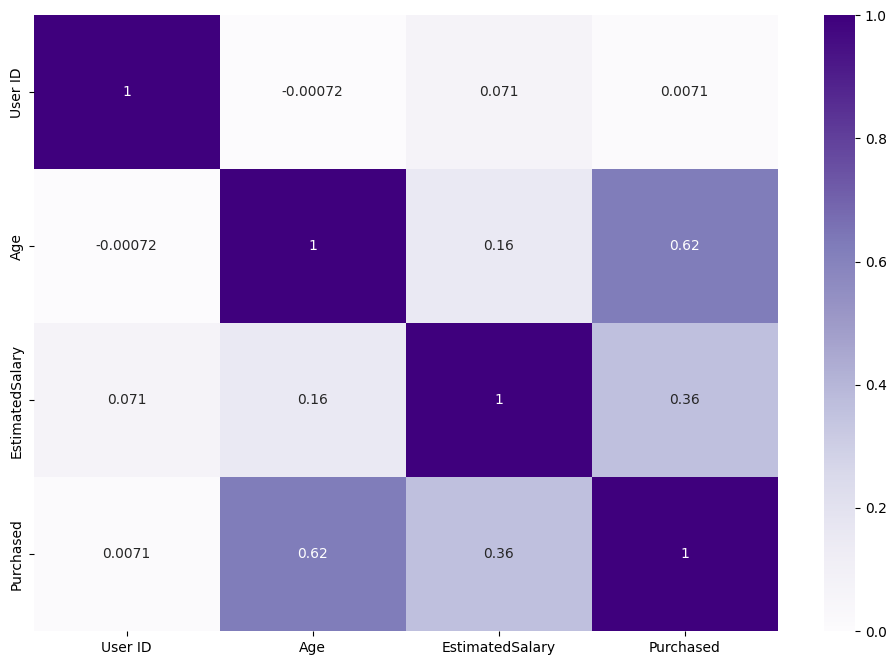

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(numeric_only= True), annot=True, cmap="Purples")

C:\Users\himme\AppData\Local\Temp\ipykernel_62380\2720408234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Purchased", data=df, palette="Purples")


<Axes: xlabel='Purchased', ylabel='count'>

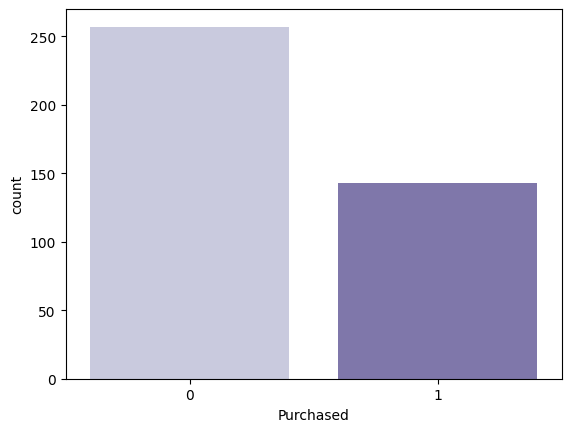

In [21]:
sns.countplot(x="Purchased", data=df, palette="Purples")

In [22]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
map_gender = {
    "Female" : 0,
    "Male" : 1
    }
df["Gender"] = df["Gender"].map(map_gender)

In [25]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [ ]:
df[["Gender", "Purchased"]].value_counts()
# Kadınlar erkeklerden biraz daha fazla almış ama somut bir ilişki var diyemeyiz cinsiyetlerle alım arasında

Gender  Purchased
1       0            130
0       0            127
        1             77
1       1             66
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

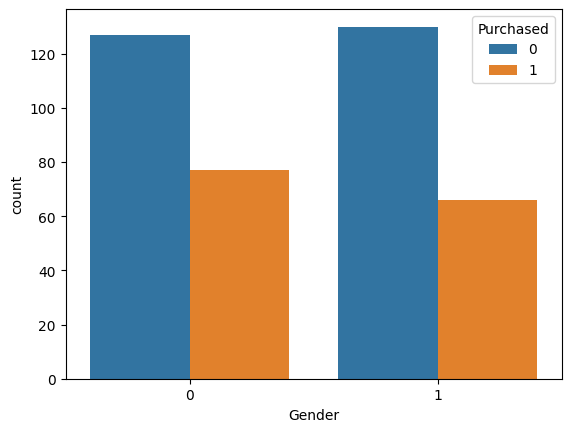

In [ ]:
sns.countplot(x="Gender", data=df, hue="Purchased")
# Bu da görseli

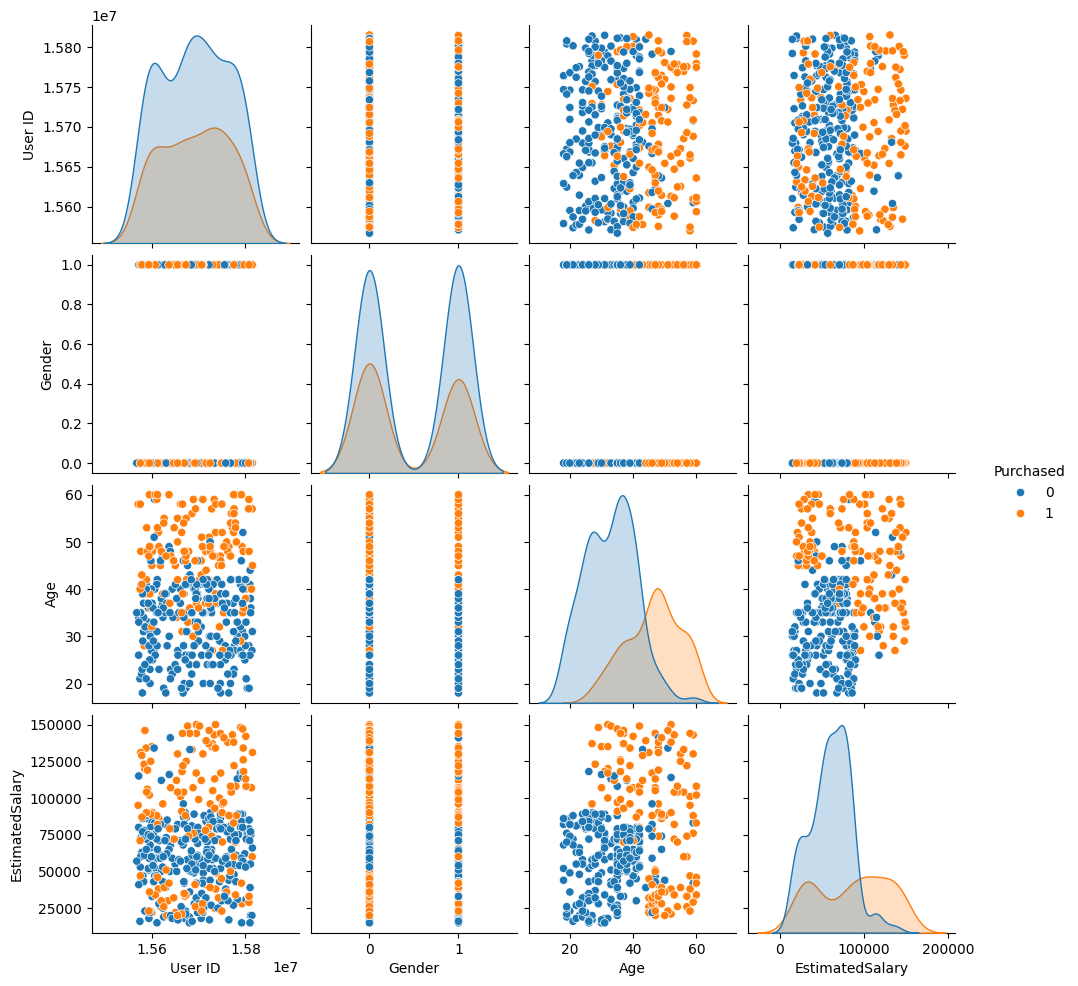

In [29]:
sns.pairplot(data=df, hue="Purchased")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

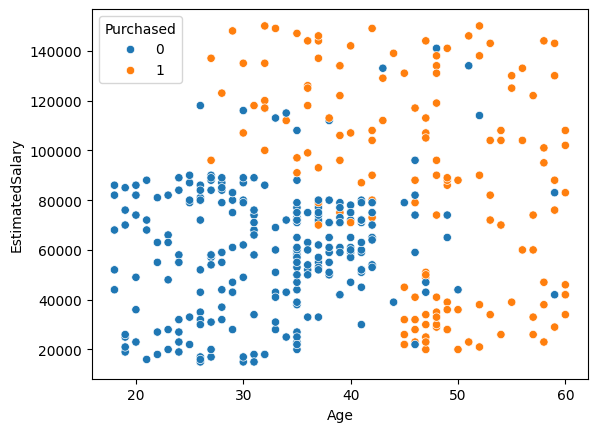

In [32]:
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased")

In [ ]:
#Not# K nın tek olduğu değerler daha iyi çift olunca sıkıntı olabiliyor tek seç K yı 

### **Train Test Split**

In [33]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

### **Model**

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors= 3)
# 3 komşuya bakacak yukarıdaki nottaki K

In [42]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
pred = knn.predict(scaled_X_test)

### Model Değerlendirme

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

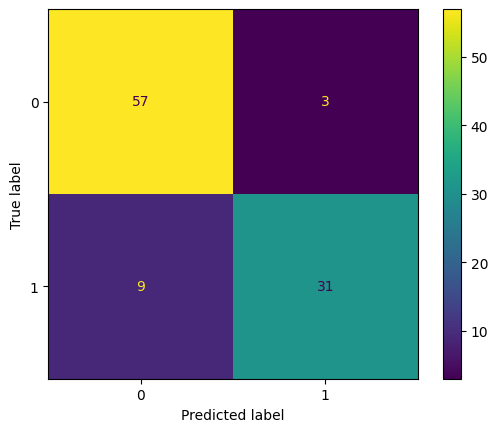

In [45]:
ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)

In [46]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        66
           1       0.78      0.91      0.84        34

    accuracy                           0.88       100
   macro avg       0.86      0.89      0.87       100
weighted avg       0.89      0.88      0.88       100



In [ ]:
# Burada yaptığımız modelimiz için en iyi olan komşu sayısını bulmak bunu GridSearchCV ile de bulunabilirdi


hata_oran = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    pred_elbow = knn.predict(scaled_X_test)

    err = 1 - accuracy_score(y_test, pred_elbow)
    hata_oran.append(err)

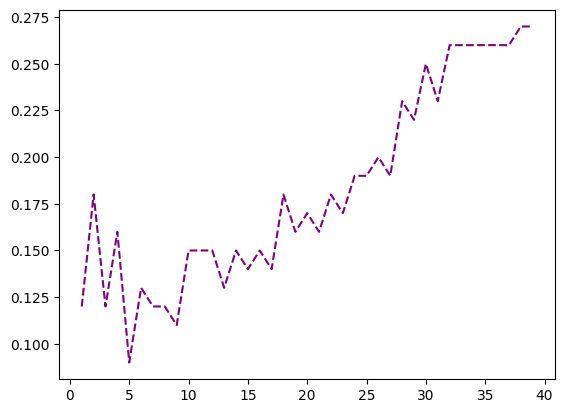

In [52]:
plt.plot(range(1,40), hata_oran, color="purple", linestyle = "dashed")

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred_elbow = knn.predict(scaled_X_test)

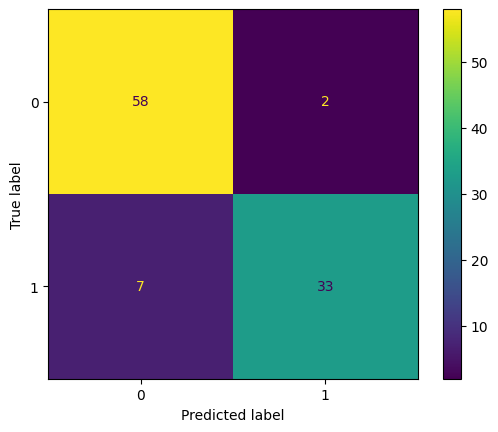

In [54]:
ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)

In [55]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        66
           1       0.78      0.91      0.84        34

    accuracy                           0.88       100
   macro avg       0.86      0.89      0.87       100
weighted avg       0.89      0.88      0.88       100



In [56]:
# Grid Search ile bir de biz yazalım madem oluyor 

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
knn_model = KNeighborsClassifier()

In [67]:
k_list = range(1, 30)

In [68]:
grid_model = GridSearchCV(knn_model, param_grid={
    "n_neighbors" : k_list
})
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)})

In [69]:
grid_model.best_params_

{'n_neighbors': 10}

In [70]:
grid_pred = grid_model.predict(scaled_X_test)

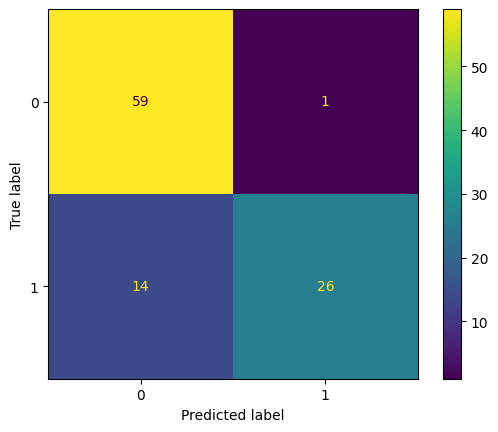

In [71]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)